# Data Analysis on Educational Attainment

**Author**: Kyle Chen - 陳證皓

- Data source: [National Center for Education Statistics](https://nces.ed.gov/programs/digest/d18/tables/dt18_104.20.asp)

In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

##### Data

In [7]:
data = pd.read_csv("data/nces-ed-attainment.csv", na_values="---")
data.tail()

,Year,Sex,Min degree,Total,White,Black,Hispanic,Asian,Pacific Islander,American Indian/Alaska Native,Two or more races
209,2014,F,master's,9.3,11.1,5.0,3.6,20.8,NaN,NaN,7.5
210,2015,F,master's,10.4,12.0,7.2,4.1,23.2,NaN,NaN,10.2
211,2016,F,master's,11.2,12.3,6.3,6.3,28.8,NaN,NaN,8.2
212,2017,F,master's,10.5,11.8,6.8,5.0,25.8,NaN,NaN,5.4
213,2018,F,master's,10.7,12.6,6.2,3.8,29.9,NaN,NaN,NaN


##### What were the percentages for women vs. men having earned a Bachelor's Degree in 1980? 

Compares the percentages of having bachelor's degree in 1980 by sex, 
returns a dataframe with a row for men and a row for women with columns 'Sex' and 'Total'.

In [8]:
df = data[(data['Year'] == 1980) & (data['Sex'] != 'A')]
df = df[df['Min degree'] == "bachelor's"]
df = df[['Sex', 'Total']]
df

,Sex,Total
112,M,24.0
180,F,21.0


##### What were the two most commonly awarded levels of educational attainment awarded between 2000-2010 (inclusive) for male?

Returns Series that shows the two most commonly awarded levels of
educational attainment awarded between 2000-2010 for all students.

In [9]:
df = data.loc[data["Sex"] == 'M']

df = df.loc[(df['Year'] >= 2000) & (df['Year'] <= 2010)]
res = df.groupby("Min degree")["Total"].mean()
res.nlargest(2)

Min degree
high school    85.957143
associate's    34.557143
Name: Total, dtype: float64

In [39]:
sns.set(font_scale=1.2) # set font size

#### Line chart
##### What are the total percentages of all people of bachelor's degree as minimal completion over years

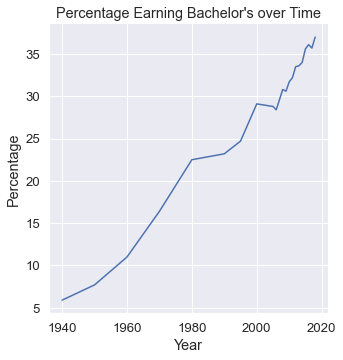

In [40]:
bachelors_df = data[['Year', 'Sex', 'Min degree', 'Total']]
bachelors_df = bachelors_df[(bachelors_df['Sex'] == 'A') &
                            (bachelors_df['Min degree'] == "bachelor's")]
bachelors_df = bachelors_df.dropna(subset=['Total'])

sns.relplot(kind='line', data=bachelors_df, x="Year", y="Total")
plt.title("Percentage Earning Bachelor's over Time")
plt.xlabel("Year")
plt.ylabel("Percentage")
plt.savefig('line_plot_bachelors.png', bbox_inches='tight')

#### Bar chart
##### What are the total percentages of women, men, and total people with a minimum education of high school degrees in the year 2009?

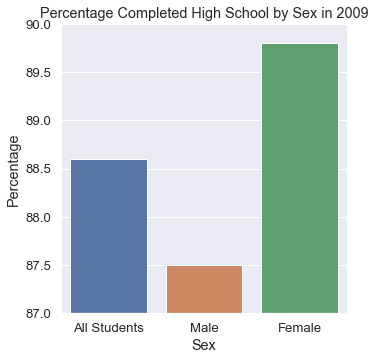

In [41]:
df = data[['Year', 'Sex', 'Min degree', 'Total']]
df = df[(df['Year'] == 2009) &
                (df['Min degree'] == 'high school')]
df = df.dropna(subset=['Total'])


g = sns.catplot(data=df, x="Sex", y="Total", kind="bar")
g.set(ylim=(87, 90))
g.set_xticklabels(["All Students", "Male", "Female"])
plt.title("Percentage Completed High School by Sex in 2009")
plt.ylabel("Percentage")
plt.savefig('bar_chart_high_school.png', bbox_inches='tight')

#### Line chart
##### How the percent of Hispanic individuals with degrees has changed between 1990 and 2010 for high school and bachelor's degrees ?

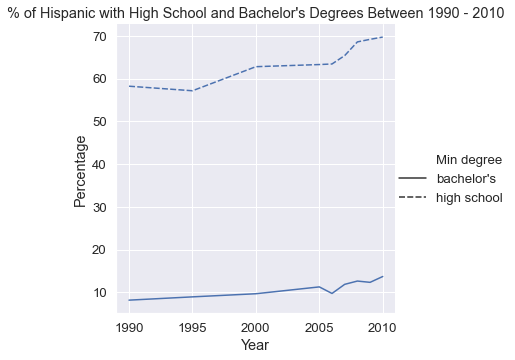

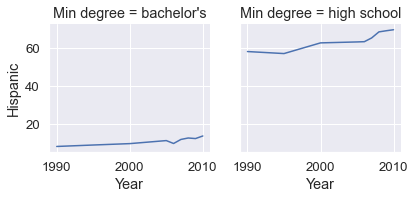

In [42]:
df = data[['Year', 'Min degree', 'Hispanic']]
df = df[(df['Year'] >= 1990) & (df['Year'] <= 2010)]
df = df[(df['Min degree'] == 'high school') |
                (df['Min degree'] == "bachelor's")]
df = df.groupby(['Year', 'Min degree']).mean().reset_index()


sns.relplot(kind='line', data=df, x="Year", y="Hispanic",
            style="Min degree")
plt.title("% of Hispanic with High School and "
          "Bachelor's Degrees Between 1990 - 2010")
plt.xlabel("Year")
plt.ylabel("Percentage")
plt.savefig('plot_hispanic_min_degree.png', bbox_inches='tight')


sep = sns.FacetGrid(df, col="Min degree")
sep.map(sns.lineplot, "Year", "Hispanic")
sep.savefig('seperate_plot_hispanic_min_degree.png', bbox_inches='tight')